In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('creditcard.csv')

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

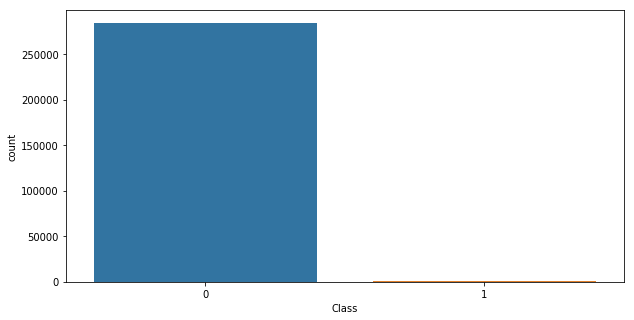

In [7]:
%matplotlib notebook
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x='Class',data=df)

In [8]:
from scipy import stats
stats.describe(df['Amount'])

DescribeResult(nobs=284807, minmax=(0.0, 25691.16), mean=88.34961925093133, variance=62560.06904632383, skewness=16.97763503663315, kurtosis=845.0777883188754)

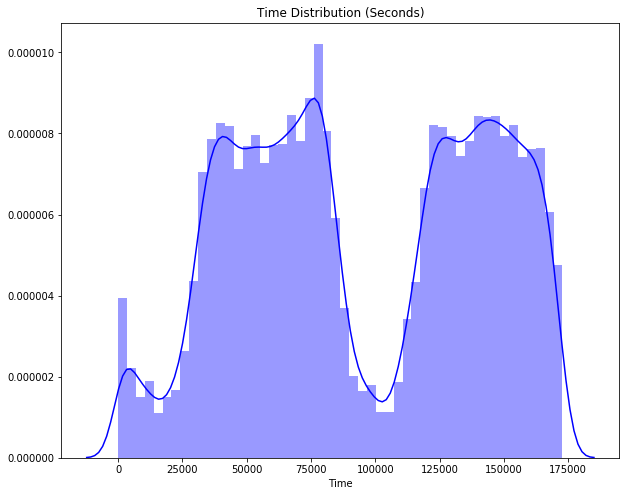

In [9]:
#plot the time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')

sns.distplot(df['Time'],color='blue');

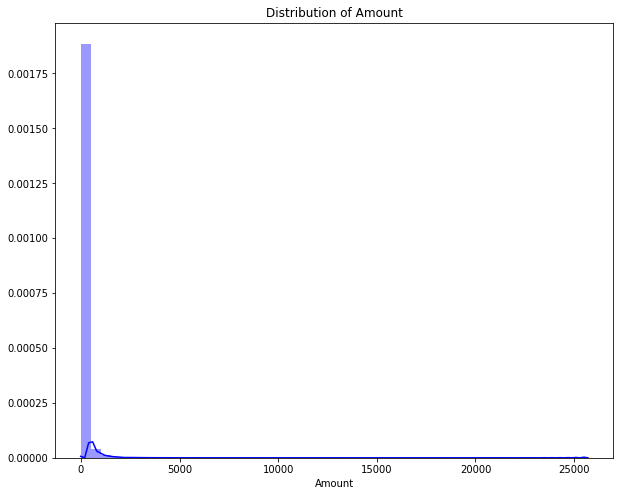

In [10]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='blue');

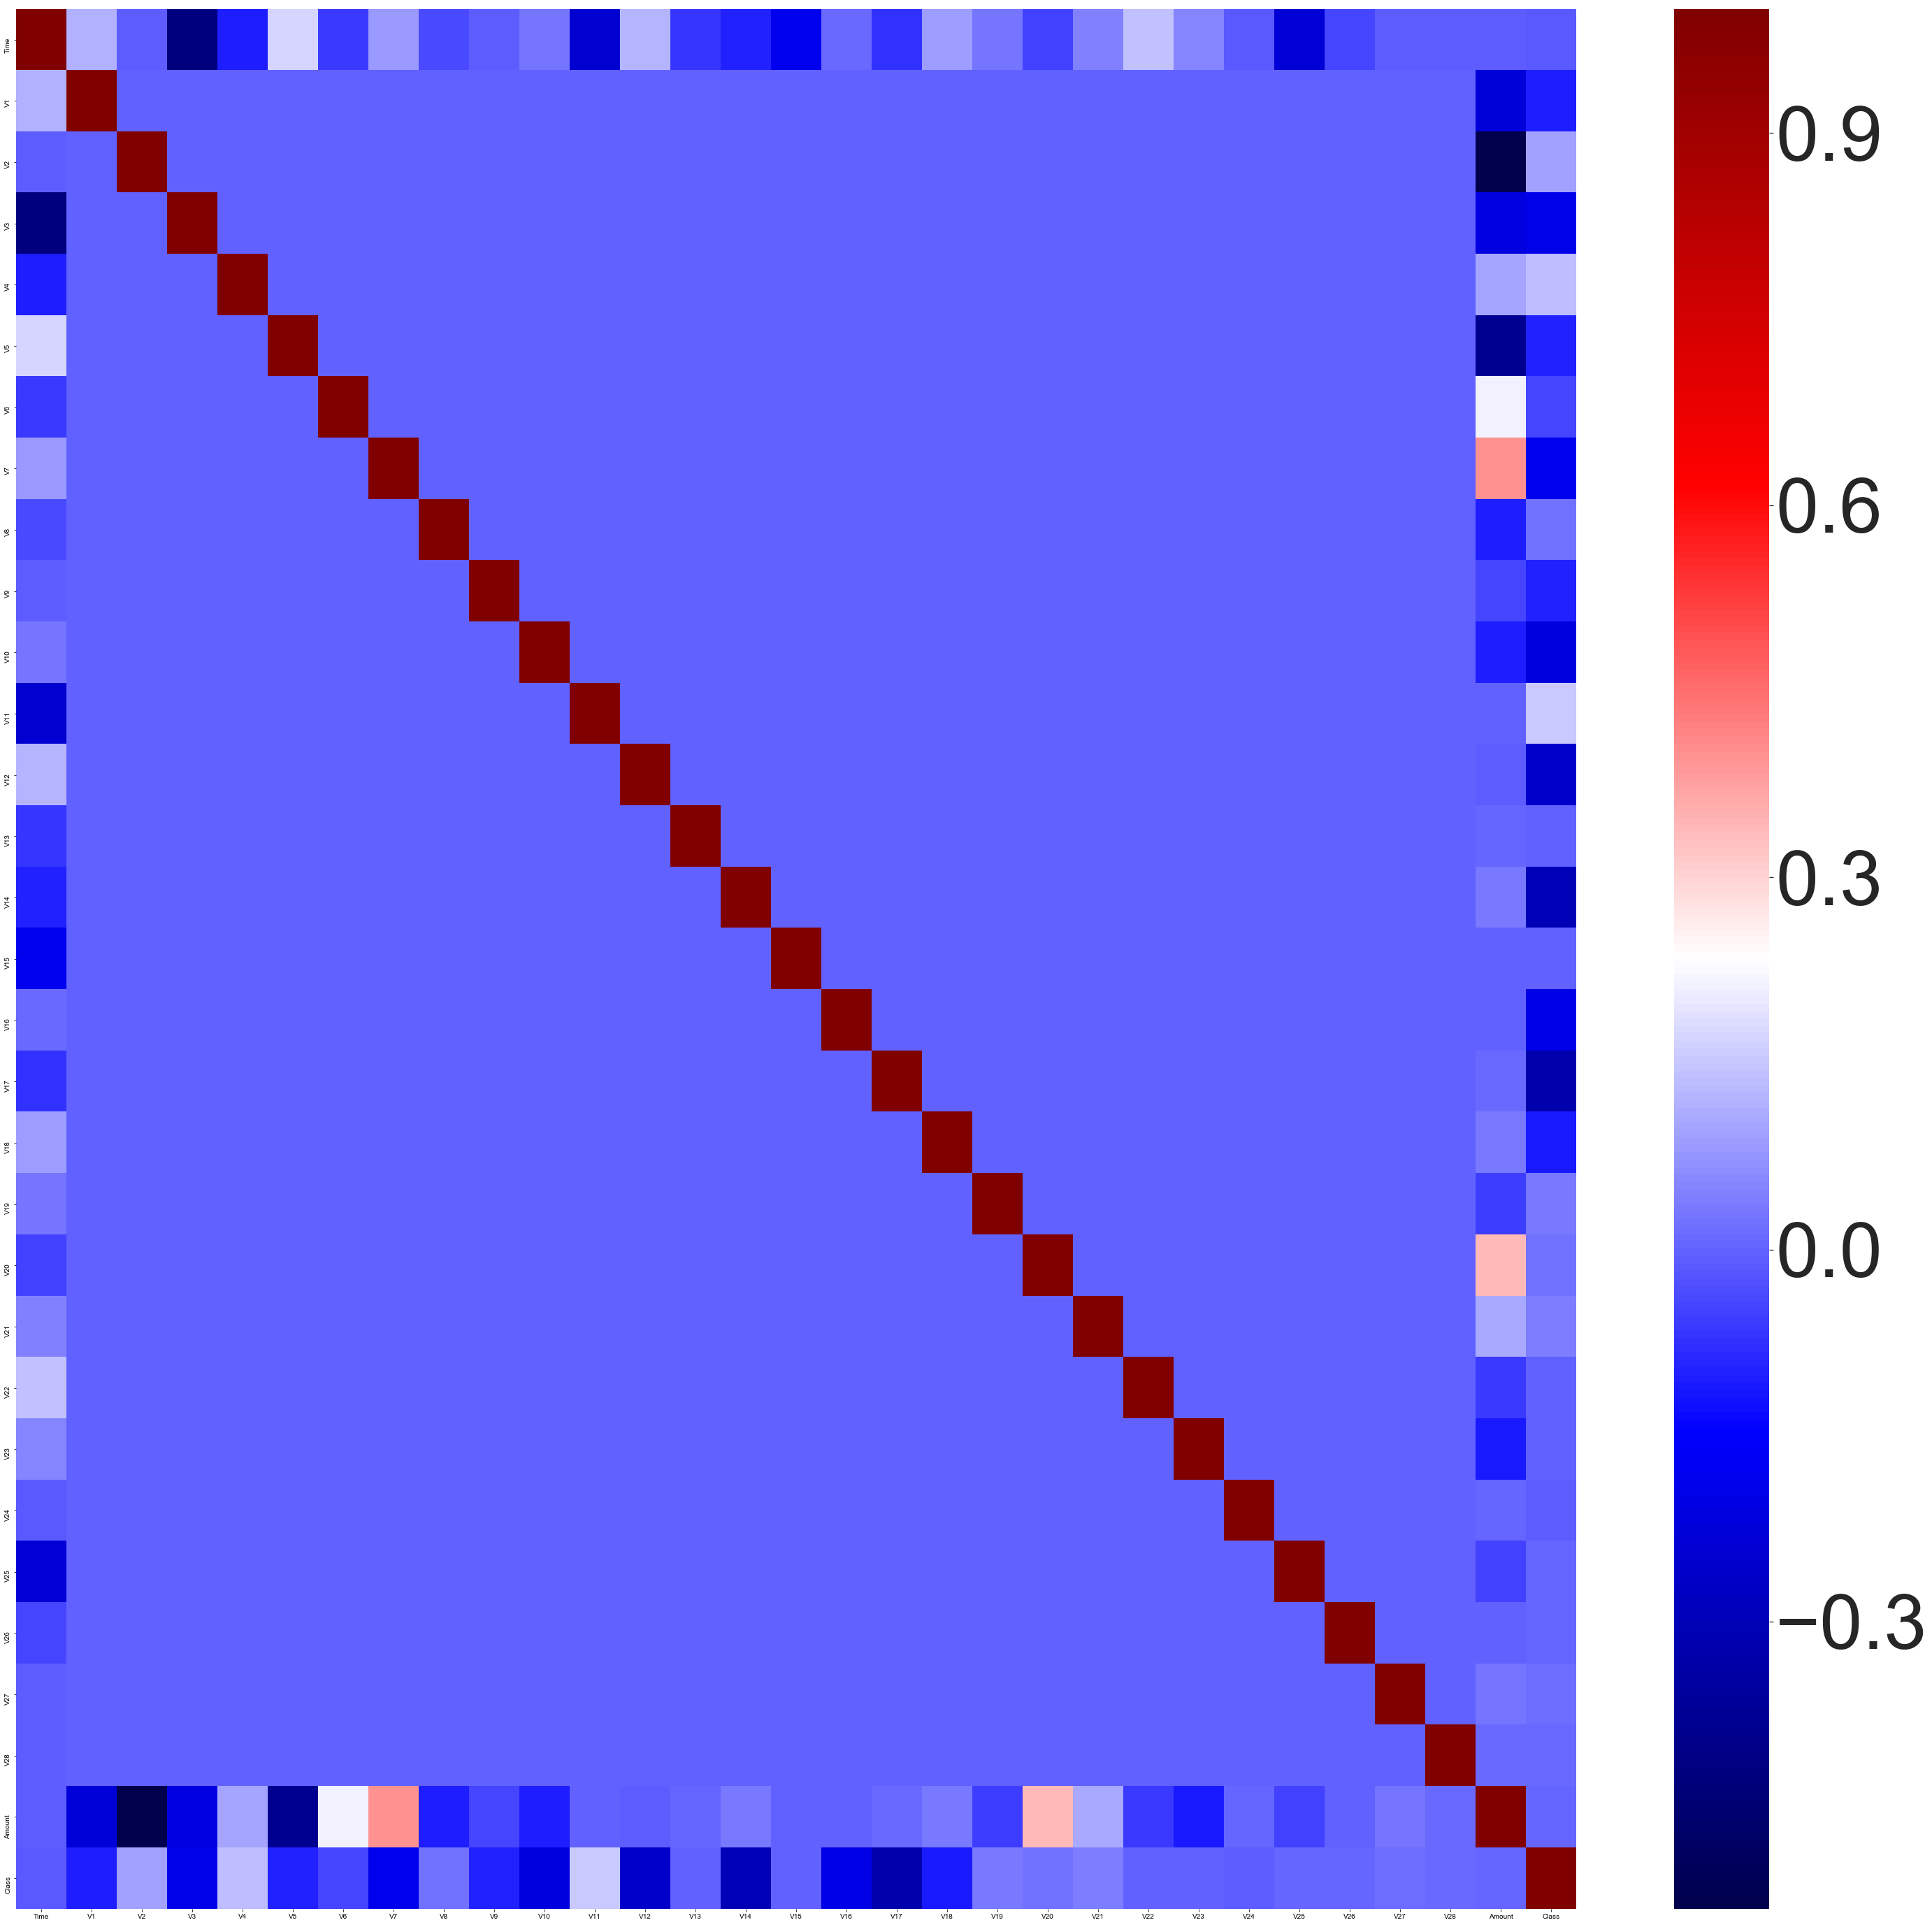

In [11]:
fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=10)
sns.heatmap(data=df.corr(), cmap="seismic", ax=ax, annot=False)
plt.show();

In [12]:
zeroes = df[df['Amount'] == 0]

In [13]:
zeroes.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0


In [14]:
features = ['V%d' % number for number in range(1, 29)] + ['Amount'] 

In [15]:
X = df[features]

In [59]:
X.hist(figsize = (200, 200))
plt.show()

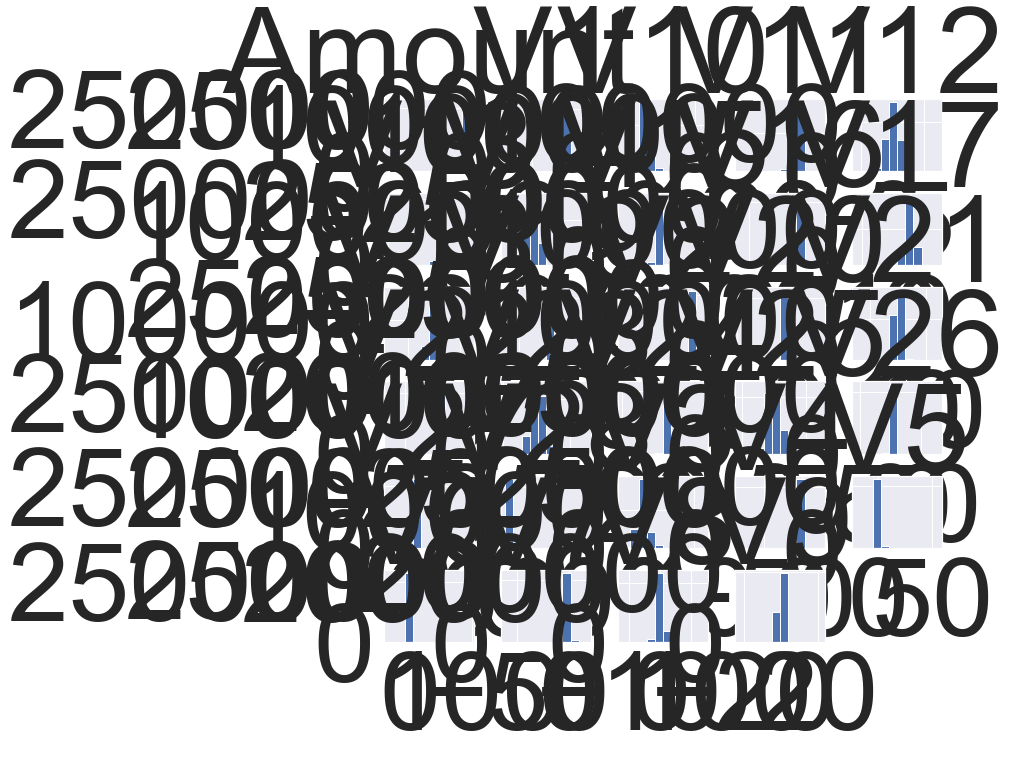

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_df = pd.DataFrame(scaler.fit_transform(X),columns = ['Amount']+['V%d'% number for number in range(1,29)])

# Plot histograms of each parameter 
X_df.hist(figsize = (10, 10) )
plt.show()

In [41]:
y = df['Class']

In [19]:
#Split the data set using 'train_test_split' function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=101)

### Down sample datasets

In [20]:
# from sklearn.utils import resample
# # concatenate our training data back together
# X_data = pd.concat([X_train, y_train], axis=1)
# not_fraud = X_data[X_data.Class==0]
# fraud = X_data[X_data.Class==1]

In [21]:
# not_fraud_downsampled = resample(not_fraud,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(fraud), # match minority n
#                                 random_state = 27) # reproducible results

# # combine minority and downsampled majority
# downsampled = pd.concat([not_fraud_downsampled, fraud])

### Create Logistic Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Create Model
model = LogisticRegression()

### Create Hyperparameters search space

In [23]:
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(-3, 4, 20)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

### Create grid search model

In [24]:
clf = GridSearchCV(model,hyperparameters,cv=5,verbose=0)

### Conduct Grid Search

In [25]:
best_model = clf.fit(X_train, y_train)

/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/opasina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [26]:
best_model.best_estimator_.get_params()

{'C': 0.06951927961775606,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
y_pred = best_model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[56854     5]
 [   41    62]]
0.7294117647058823


### Create SVM Classifier

In [29]:
from sklearn.svm import SVC
modelsvm = SVC()

In [30]:
gamma = 'auto'

# Create regularization hyperparameter space
Csvm = np.logspace(-3, 4, 20)


# Create hyperparameter options
hyperparametersvm = dict(C=Csvm)

In [31]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

### Create GridSearch Model for SVM

In [32]:
clfsvm = GridSearchCV(modelsvm,tuned_parameters,cv=5,verbose=1)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_svm = scaling.transform(X_train)
X_test_svm = scaling.transform(X_test)

### Conduct GridSearch for SVM Classifier

In [34]:
# best_modelsvm = clfsvm.fit(X_train_svm, y_train)

### SVM took so long because the datasets is too large and converting the observation on the hyperplane is tough

### Perform Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()

In [36]:
naivebayes.fit(X_train,y_train)
y_pred_naive = naivebayes.predict(X_test)

## Evaluation of Naive Bayes Model

In [37]:
print(confusion_matrix(y_test,y_pred_naive))
print(f1_score(y_test,y_pred_naive))

[[55572  1287]
 [   15    88]]
0.11907983761840325


Naive bayes does poorly as compared to logistic regression but it was a very fast model

### Use random forest classifier

In [44]:
# from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [10, 20, 30, 300]
# }
# modelrandom = RandomForestClassifier()

In [45]:
# clfrandom = GridSearchCV(modelrandom,param_grid,cv=5,verbose=1)

In [46]:
# best_modelrandom = clfrandom.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [53]:
modelrandom = RandomForestClassifier(n_estimators=20)

In [54]:
best_modelrandom = modelrandom.fit(X_train, y_train)

In [55]:
y_predrandom = best_modelrandom.predict(X_test)

In [56]:
print(confusion_matrix(y_test,y_predrandom))
print(f1_score(y_test,y_predrandom))

[[56854     5]
 [   19    84]]
0.8749999999999999
